In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn.decomposition import PCA
from scipy.io import loadmat
data = loadmat('notMNIST_small.mat')
X_temp = data['images']/255

  
X = np.empty(shape=[X_temp.shape[2]] + [784], dtype='float32')
for i in range(X_temp.shape[2]):
    X[i,:] = X_temp[:,:,i].flatten()

y = pd.get_dummies(data['labels']).as_matrix()

print X_temp.shape
print X.shape
print y.shape
X[1,:]

(28L, 28L, 18724L)
(18724L, 784L)
(18724L, 10L)


array([ 0.        ,  0.00392157,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.03137255,  0.16078432,  0.38039216,  0.65098041,  0.87058824,
        0.97647059,  0.90588236,  0.66274512,  0.40000001,  0.11764706,
        0.        ,  0.00784314,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.07450981,
        0.36470589,  0.44313726,  0.42745098,  0.4627451 ,  0.50196081,
        0.54509807,  0.63921571,  0.77254903,  0.86274511,  0.96078432,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        0.99607843,  1.        ,  0.94509804,  0.42352942,  0.        ,
        0.00392157,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.01176471,  0.65490198,  1.        ,  0.98431373,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  0.99607843,  0.98039216,  0.97

(28L, 28L)


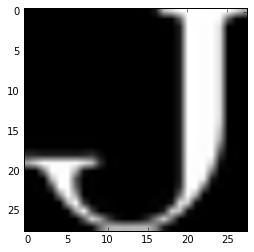

In [5]:
print X_temp[:,:,3].shape
plt.imshow(X_temp[:,:,3],cmap="gray");

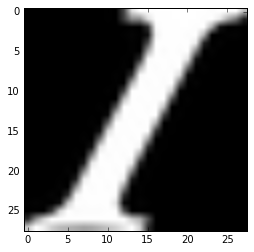

In [6]:
plt.imshow(X_temp[:,:,4504],cmap="gray");

In [7]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=50)
print X_train.shape
print y_train.shape

(14979L, 784L)
(14979L, 10L)


In [8]:
#fcpca = PCA(n_components=0.9)
#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)
#X_pca = pca.transform(X)

#print X_train_pca.shape
#print X_test_pca.shape
#print pca
#X_train = X_train_pca
#X_test = X_test_pca

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

np.random.seed = 1

model = Sequential()

model.add(Dense(output_dim=392, input_shape=[X_train.shape[1]], activation='relu', W_regularizer=l2(0)))
model.add(Dense(output_dim=392, activation='relu'))
model.add(Dense(output_dim=392, activation='relu'))
model.add(Dense(output_dim=392, activation='relu'))
model.add(Dense(output_dim=392, activation='relu'))
model.add(Dense(output_dim=10, activation='sigmoid'))


# Compile model
sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
#model.compile(loss='mean_squared_error', optimizer=sgd)

In [31]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_61 (Dense)                 (None, 392)           307720      dense_input_11[0][0]             
____________________________________________________________________________________________________
dense_62 (Dense)                 (None, 392)           154056      dense_61[0][0]                   
____________________________________________________________________________________________________
dense_63 (Dense)                 (None, 392)           154056      dense_62[0][0]                   
____________________________________________________________________________________________________
dense_64 (Dense)                 (None, 392)           154056      dense_63[0][0]                   
___________________________________________________________________________________________

In [32]:
# Fit the model
history = model.fit(X_train, y_train, batch_size = 256,
          nb_epoch = 20, verbose=2, validation_data=(X_test,y_test))

Train on 14979 samples, validate on 3745 samples
Epoch 1/20
1s - loss: 1.7434 - val_loss: 0.7378
Epoch 2/20
1s - loss: 0.6447 - val_loss: 0.4256
Epoch 3/20
1s - loss: 0.4258 - val_loss: 0.3686
Epoch 4/20
1s - loss: 0.3546 - val_loss: 0.3570
Epoch 5/20
1s - loss: 0.3186 - val_loss: 0.3581
Epoch 6/20
1s - loss: 0.2940 - val_loss: 0.3528
Epoch 7/20
1s - loss: 0.2830 - val_loss: 0.3853
Epoch 8/20
1s - loss: 0.2594 - val_loss: 0.3133
Epoch 9/20
1s - loss: 0.2433 - val_loss: 0.3164
Epoch 10/20
1s - loss: 0.2314 - val_loss: 0.3217
Epoch 11/20
1s - loss: 0.2226 - val_loss: 0.3281
Epoch 12/20
1s - loss: 0.2387 - val_loss: 0.3954
Epoch 13/20
1s - loss: 0.1902 - val_loss: 0.3228
Epoch 14/20
1s - loss: 0.1872 - val_loss: 0.2801
Epoch 15/20
1s - loss: 0.1613 - val_loss: 0.3021
Epoch 16/20
1s - loss: 0.1514 - val_loss: 0.3047
Epoch 17/20
1s - loss: 0.1483 - val_loss: 0.3466
Epoch 18/20
1s - loss: 0.1294 - val_loss: 0.4374
Epoch 19/20
1s - loss: 0.7263 - val_loss: 0.3419
Epoch 20/20
2s - loss: 0.1803

Loss after final iteration:  0.37759188907


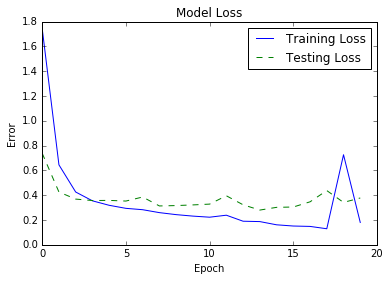

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Model Loss')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()